# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge

# Problem Definition
## Latar Belakang
Dengan semakin meningkatnya penggunaan email sebagai alat komunikasi utama dalam bisnis dan kehidupan sehari-hari, spam email menjadi masalah yang semakin meresahkan. Spam email tidak hanya mengganggu produktivitas pengguna, tetapi juga dapat menjadi sumber penipuan, serangan malware, dan ancaman keamanan lainnya. Oleh karena itu, deteksi spam email menjadi sangat penting dalam memastikan keamanan dan efisiensi penggunaan email.
## Tujuan Penelitian
Mengembangkan model machine learning yang dapat secara efektif mendeteksi spam email. Model ini akan membantu dalam memfilter email yang masuk ke kotak masuk pengguna, meminimalkan gangguan dan risiko keamanan yang ditimbulkan oleh spam email.
## Rumusan Masalah
Bagaimana mengidentifikasi dan mengklasifikasikan email sebagai spam atau bukan spam menggunakan machine learning?
Bagaimana mempersiapkan data email dan fitur-fiturnya agar sesuai untuk penggunaan dalam model machine learning?
## Data yang akan dipakai
Nama pengunggah : Marcel Wiechmann, 
Sumber data : https://github.com/MWiechmann/enron_spam_data, 
Deskripsi dataset : The Enron-Spam dataset is a fantastic ressource collected by V. Metsis, I. Androutsopoulos and G. Paliouras and described in their publication "Spam Filtering with Naive Bayes - Which Naive Bayes?". The dataset contains a total of 17.171 spam and 16.545 non-spam ("ham") e-mail messages (33.716 e-mails total).
## Metode
Pemrosesan Data: Data email akan dimuat, dibersihkan dari informasi yang tidak relevan (misalnya, hyperlink, tanda baca yang tidak penting), dan diubah menjadi representasi numerik menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency).

Pembuatan Model: Berbagai model machine learning, seperti Random Forest, Support Vector Machine (SVM), Multinomial Naive Bayes, dan lain-lain, akan diterapkan dan dilatih menggunakan data email yang telah diproses.

Evaluasi Model: Setiap model akan dievaluasi menggunakan metrik kinerja seperti akurasi, presisi, recall, dan F1-score. Confusion matrix dan classification report juga akan digunakan untuk memberikan wawasan tentang kinerja model secara lebih rinci.

# Preparation | Persiapan
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import precision_score, recall_score


## Get Data | Mendapatkan Data

In [48]:
# Membuat DataFrame dari ekstensi csv dengan pandas
df = pd.read_csv(r'D:\Skilvul\Tugas ML\dataset\enron_spam_data.csv')

Membuat DataFrame dari ekstensi csv dengan pandas

## Explore Data (EDA) | Eksplorasi Data

In [3]:
 # Menampilkan data 5 teratas dan 5 terakhir
df

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


In [4]:
# Menampilkan 5 data teratas
df.head()

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


In [5]:
# Menampilkan 5 data terakhir
df.tail()

,Message ID,Subject,Message,Spam/Ham,Date
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30
33715,33715,"dear sir , i am interested in it",hi : )\ndo you need some softwares ? i can giv...,spam,2005-07-31


In [6]:
# Melihat jumalh Baris dan Kolom
df.shape

(33716, 5)

In [7]:
# Menampilkan info lengkap dari DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [8]:
# Menampilkan statistik pada semua kolom termasuk data non numerik
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Message ID,33716.0,NaN,NaN,NaN,16857.5,9733.115174,0.0,8428.75,16857.5,25286.25,33715.0
Subject,33427,24206,schedule crawler : hourahead failure,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Message,33345,29779,click here to be removed\n,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spam/Ham,33716,2,spam,17171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,33716,1527,2005-07-19,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Mencari jumlah total nilai duplikat DataFrame
df.duplicated().sum() 

0

In [10]:
# Mencari jumlah total missing value DataFrame
df.isna().sum() 

Message ID      0
Subject       289
Message       371
Spam/Ham        0
Date            0
dtype: int64

In [11]:
# Menampilkan baris yang terdapat missing value
df[df.isnull().sum(axis=1) > 0] 

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
183,183,day 26 - txu lonestar called on 20000 at carthage,NaN,ham,2000-01-25
199,199,is this fri feb 11 a problem for taking vacati...,NaN,ham,2000-01-28
304,304,http : / / www . pge - texas . com / www / gtt...,NaN,ham,2000-02-15
1655,1655,revised,NaN,ham,2000-09-21
...,...,...,...,...,...
32833,32833,NaN,"why paily for pobrne ?\nas a lrpim "" itecd ti ...",spam,2005-05-14
32835,32835,NaN,"are youu stil 3 l pa margin - right : 8 "" alig...",spam,2005-05-14
32898,32898,NaN,pre - ejeculators :\nplease read here for info...,spam,2005-05-19
32926,32926,NaN,there ' s never been a better time to re _ fin...,spam,2005-05-21


In [12]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom 'Message'
count_values = df['Message'].value_counts()

# Memilih nilai yang paling banyak muncul
most_common_value = count_values.idxmax()

# Memilih baris-baris dengan nilai yang paling banyak muncul
most_common_rows = df[df['Message'] == most_common_value]

# Menampilkan baris-baris yang dipilih
print("Baris dengan nilai paling banyak muncul pada kolom 'Message':")
print(most_common_rows)

Baris dengan nilai paling banyak muncul pada kolom 'Message':
       Message ID                             Subject  \
3888         3888                    meet local women   
3889         3889                     19 and readyyet   
3895         3895                  satisfy her nj 2 w   
3910         3910                      growth is good   
3916         3916              just got out of school   
...           ...                                 ...   
20062       20062  oxyccconttttin no script neeeeeded   
20150       20150                             meet me   
20168       20168               i bet you ' re creamy   
20177       20177                  i want to kiss you   
24633       24633  women with cum on their face ! ! !   

                          Message Spam/Ham        Date  
3888   click here to be removed\n     spam  2004-04-04  
3889   click here to be removed\n     spam  2004-04-05  
3895   click here to be removed\n     spam  2004-04-07  
3910   click here to be r

In [13]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom 'Subject'
count_values = df['Subject'].value_counts()

# Memilih nilai yang paling sering muncul
most_common_value = count_values.idxmax()

# Memilih baris-baris dengan nilai yang paling sering muncul
most_common_rows = df[df['Subject'] == most_common_value]

# Menampilkan baris-baris yang dipilih
print("Baris dengan nilai terbanyak pada kolom 'Subject':")
print(most_common_rows)

Baris dengan nilai terbanyak pada kolom 'Subject':
       Message ID                               Subject  \
17261       17261  schedule crawler : hourahead failure   
17264       17264  schedule crawler : hourahead failure   
17269       17269  schedule crawler : hourahead failure   
17273       17273  schedule crawler : hourahead failure   
17283       17283  schedule crawler : hourahead failure   
...           ...                                   ...   
18014       18014  schedule crawler : hourahead failure   
18018       18018  schedule crawler : hourahead failure   
18023       18023  schedule crawler : hourahead failure   
18025       18025  schedule crawler : hourahead failure   
18032       18032  schedule crawler : hourahead failure   

                                                 Message Spam/Ham        Date  
17261  start date : 12 / 11 / 01 ; hourahead hour : 1...      ham  2001-12-11  
17264  start date : 12 / 11 / 01 ; hourahead hour : 1...      ham  2001-12-11  


## Clean Data | Membersihkan Data

In [14]:
# Menghapus tabel yang tidak dibutuhkan yaitu Message ID dan Date
df.drop(['Message ID', 'Date'], axis=1, inplace=True)

# Menghapus baris dengan nilai NaN pada kolom Subject dan Message
df = df.dropna(subset=['Subject', 'Message'])

In [15]:
# Mengecek kembali missing value atau NaN pada DataFrame
df.isna().sum() 

Subject     0
Message     0
Spam/Ham    0
dtype: int64

Mengecek Unique Value pada setiap kolom

In [16]:
df['Subject'].value_counts()

Subject
schedule crawler : hourahead failure                      185
re :                                                      162
all graphics software available , cheap oem versions .    107
localized software , all languages available .            101
perfect logo charset = koi 8 - r " >                       97
                                                         ... 
holli krebs resigns                                         1
re : lavorato                                               1
enymex                                                      1
originations schedules                                      1
bloow in 5 - 10 times the time                              1
Name: count, Length: 23968, dtype: int64

In [17]:
df['Message'].value_counts()

Message
click here to be removed\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Menampilkan jumlah baris dari nilai Ham dan Spam kemudian di visualisasikan dengan bar chart

In [18]:
df['Spam/Ham'].value_counts()

Spam/Ham
spam    16614
ham     16493
Name: count, dtype: int64

Text(0.5, 1.0, 'Perbandingan Spam email dan Ham email messages')

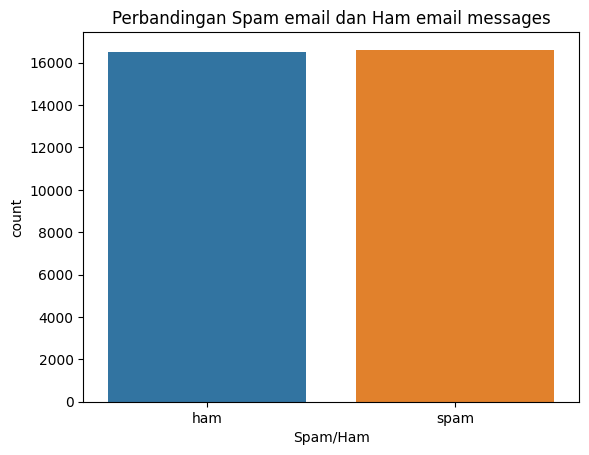

In [19]:
# Membuat sebuah bar chart dari jumlah data pada kolom Spam/Ham
colors = ["#1f77b4", "#ff7f0e"]
sns.countplot(data=df, x='Spam/Ham', hue='Spam/Ham', palette=colors)
plt.xlabel('Spam/Ham')
plt.title('Perbandingan Spam email dan Ham email messages')

Membersihkan teks dari tanda baca dan simbol dengan tujuan menyederhanakan data teks dan hal tersebut tidak termasuk dalam informasi penting yang dapat membantu pemodelan

In [20]:
def clean_text(text):    
    # Menghapus hyperlink
    text = re.sub(r'http\S+', '', text)
    
    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    
    # Menghapus spasi tambahan
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()  # Menghapus spasi di awal dan akhir teks

# Terapkan fungsi clean_text ke kolom yang ditentukan dalam DataFrame
df.loc[:, "Subject"] = df["Subject"].apply(clean_text)
df.loc[:, "Message"] = df["Message"].apply(clean_text)

Visualisasi kata paling banyak menggunakan Wordcloud pada Kolom Subject dan Messsage

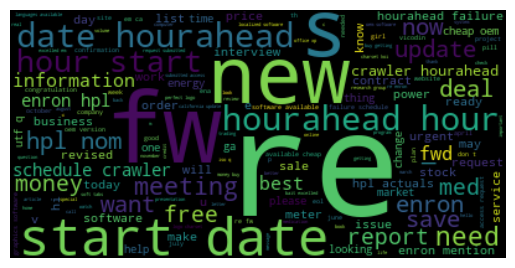

In [21]:
text = ' '.join(df['Subject'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

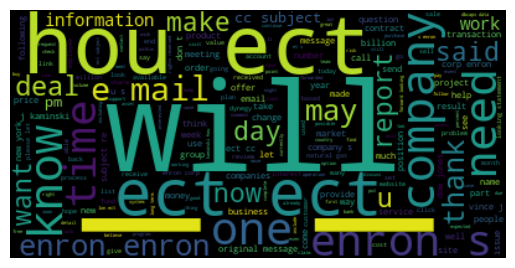

In [22]:
text = ' '.join(df['Message'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Melakukan split data dengan membagi data menjadi train set dan test set. Sebelumnya pada features X yang berupa data teks diubah menjadi numerical features untuk memudahkan Algoritma model yang dilatih. Kemudian dilakukan pensklaan pada features X menggunakan salah satu metode dari MaxAbsScaler() dari scikit-learn karena beberapa algoritma model memerlukan data yang telah di skalakan seperti SVC dan MLP serta dapat meningkatkan peforma model

In [23]:
# split data menjadi sebuah matrix dari features X dan Dependent Variable y
X = df[['Subject', 'Message']]
y = df['Spam/Ham']

# Convert text data menjadi numerical features menggunakan metode TF-IDF
vectorizer = TfidfVectorizer()
X_features = vectorizer.fit_transform(X['Subject'].values + ' ' + X['Message'].values)

# split menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MaxAbsScaler

# Scale the X features
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier

Random Forest adalah metode ensemble yang terdiri dari banyak pohon keputusan. Setiap pohon melakukan prediksi independen, dan hasilnya diambil melalui voting atau averaging.

Model Training

In [24]:
# define the Classifier
model1 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, 
                       min_samples_leaf=1, random_state=42)

# Train the model
model1.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

In [25]:
# Prediksi label pada data train
y_train_pred_model1 = model1.predict(X_train_scaled)

# Hitung metrik evaluasi pada data train
train_accuracy = accuracy_score(y_train, y_train_pred_model1)
train_precision = precision_score(y_train, y_train_pred_model1, pos_label='ham')
train_recall = recall_score(y_train, y_train_pred_model1, pos_label='ham')
train_f1_score = f1_score(y_train, y_train_pred_model1, pos_label='ham')

# Prediksi label pada data test
y_test_pred_model1 = model1.predict(X_test_scaled)

# Hitung metrik evaluasi pada data test
test_accuracy = accuracy_score(y_test, y_test_pred_model1)
test_precision = precision_score(y_test, y_test_pred_model1, pos_label='ham')
test_recall = recall_score(y_test, y_test_pred_model1, pos_label='ham')
test_f1_score = f1_score(y_test, y_test_pred_model1, pos_label='ham')

# Tampilkan skor
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print()
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)

Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0

Test Accuracy: 0.9880700694654183
Test Precision: 0.9920731707317073
Test Recall: 0.9839733897792561
Test F1 Score: 0.9880066798238956


In [26]:
confusion_matrix(y_test,y_test_pred_model1)

array([[3254,   53],
       [  26, 3289]], dtype=int64)

In [27]:
classification_report(y_test,y_test_pred_model1)

'              precision    recall  f1-score   support\n\n         ham       0.99      0.98      0.99      3307\n        spam       0.98      0.99      0.99      3315\n\n    accuracy                           0.99      6622\n   macro avg       0.99      0.99      0.99      6622\nweighted avg       0.99      0.99      0.99      6622\n'

# Support Vector Classifier

SVC adalah model yang mencoba menemukan hyperplane terbaik yang membagi data menjadi kelas yang berbeda dalam ruang fitur.

Model Training

In [28]:
# define the Classifier
model2 = SVC(C = 50, gamma = "scale")

# Train the model
model2.fit(X_train_scaled, y_train)

SVC(C=50)

Model Evaluation

In [29]:
# Prediksi label pada data train
y_train_pred_model2 = model2.predict(X_train_scaled)

# Hitung metrik evaluasi pada data train
train_accuracy = accuracy_score(y_train, y_train_pred_model2)
train_precision = precision_score(y_train, y_train_pred_model2, pos_label='ham')
train_recall = recall_score(y_train, y_train_pred_model2, pos_label='ham')
train_f1_score = f1_score(y_train, y_train_pred_model2, pos_label='ham')

# Prediksi label pada data test
y_test_pred_model2 = model2.predict(X_test_scaled)

# Hitung metrik evaluasi pada data test
test_accuracy = accuracy_score(y_test, y_test_pred_model2)
test_precision = precision_score(y_test, y_test_pred_model2, pos_label='ham')
test_recall = recall_score(y_test, y_test_pred_model2, pos_label='ham')
test_f1_score = f1_score(y_test, y_test_pred_model2, pos_label='ham')

# Tampilkan skor
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print()
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)

Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0

Test Accuracy: 0.9341588643914225
Test Precision: 0.9979188345473465
Test Recall: 0.869972785001512
Test F1 Score: 0.9295638126009693


In [30]:
confusion_matrix(y_test,y_test_pred_model2)

array([[2877,  430],
       [   6, 3309]], dtype=int64)

In [31]:
classification_report(y_test,y_test_pred_model2)

'              precision    recall  f1-score   support\n\n         ham       1.00      0.87      0.93      3307\n        spam       0.88      1.00      0.94      3315\n\n    accuracy                           0.93      6622\n   macro avg       0.94      0.93      0.93      6622\nweighted avg       0.94      0.93      0.93      6622\n'

# Multinominal Naive Bayes

Naive Bayes adalah model probabilistik berbasis teorema Bayes dengan asumsi independensi fitur. Model ini relatif cepat dan efisien dalam penggunaan memori, dan sering kali memberikan hasil yang baik dalam tugas klasifikasi teks dan terbukti dengan waktu training yang cepat dan dengan hasil yang baik.

Model Training

In [32]:
# Membuat objek MultinomialNB dengan parameter dengan nilai default
model3 = MultinomialNB(alpha=1.0, fit_prior=True)

# Train the model
model3.fit(X_train_scaled, y_train)

MultinomialNB()

Model Evaluation

In [33]:
# Prediksi label pada data train
y_train_pred_model3 = model3.predict(X_train_scaled)

# Hitung metrik evaluasi pada data train
train_accuracy = accuracy_score(y_train, y_train_pred_model3)
train_precision = precision_score(y_train, y_train_pred_model3, pos_label='ham')
train_recall = recall_score(y_train, y_train_pred_model3, pos_label='ham')
train_f1_score = f1_score(y_train, y_train_pred_model3, pos_label='ham')

# Prediksi label pada data test
y_test_pred_model3 = model3.predict(X_test_scaled)

# Hitung metrik evaluasi pada data test
test_accuracy = accuracy_score(y_test, y_test_pred_model3)
test_precision = precision_score(y_test, y_test_pred_model3, pos_label='ham')
test_recall = recall_score(y_test, y_test_pred_model3, pos_label='ham')
test_f1_score = f1_score(y_test, y_test_pred_model3, pos_label='ham')

# Tampilkan skor
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print()
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)

Train Accuracy: 0.9933924863130074
Train Precision: 0.9882176360225141
Train Recall: 0.9986349158198089
Train F1 Score: 0.9933989664667496

Test Accuracy: 0.9694956206584113
Test Precision: 0.9467625899280575
Test Recall: 0.9948593891744784
Test F1 Score: 0.9702152757298732


In [34]:
confusion_matrix(y_test,y_test_pred_model3)

array([[3290,   17],
       [ 185, 3130]], dtype=int64)

In [35]:
classification_report(y_test,y_test_pred_model3)

'              precision    recall  f1-score   support\n\n         ham       0.95      0.99      0.97      3307\n        spam       0.99      0.94      0.97      3315\n\n    accuracy                           0.97      6622\n   macro avg       0.97      0.97      0.97      6622\nweighted avg       0.97      0.97      0.97      6622\n'

# Multi-layer Perceptron classifier

 MLP adalah jenis jaringan saraf tiruan dengan beberapa lapisan (termasuk lapisan tersembunyi) yang digunakan untuk tugas klasifikasi dan regresi. MLP merupakan salah satu contoh dari penggunaan Neural Network dimana model yang terinspirasi oleh bagaimana neuron dalam otak manusia bekerja sehingga Model ini kompleks serta membutuhkan waktu yang cukup lama saat training.

Model Training

In [36]:
# Membuat objek MultinomialNB dengan parameter dengan nilai default
model4 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam')

# Train the model
model4.fit(X_train_scaled, y_train)

MLPClassifier()

Model Evaluation

In [37]:
# Prediksi label pada data train
y_train_pred_model4 = model4.predict(X_train_scaled)

# Hitung metrik evaluasi pada data train
train_accuracy = accuracy_score(y_train, y_train_pred_model4)
train_precision = precision_score(y_train, y_train_pred_model4, pos_label='ham')
train_recall = recall_score(y_train, y_train_pred_model4, pos_label='ham')
train_f1_score = f1_score(y_train, y_train_pred_model4, pos_label='ham')

# Prediksi label pada data test
y_test_pred_model4 = model4.predict(X_test_scaled)

# Hitung metrik evaluasi pada data test
test_accuracy = accuracy_score(y_test, y_test_pred_model4)
test_precision = precision_score(y_test, y_test_pred_model4, pos_label='ham')
test_recall = recall_score(y_test, y_test_pred_model4, pos_label='ham')
test_f1_score = f1_score(y_test, y_test_pred_model4, pos_label='ham')

# Tampilkan skor
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print()
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)

Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0

Test Accuracy: 0.9915433403805497
Test Precision: 0.991236022967664
Test Recall: 0.9918355004535833
Test F1 Score: 0.9915356711003628


In [38]:
confusion_matrix(y_test,y_test_pred_model4)

array([[3280,   27],
       [  29, 3286]], dtype=int64)

In [39]:
classification_report(y_test,y_test_pred_model4)

'              precision    recall  f1-score   support\n\n         ham       0.99      0.99      0.99      3307\n        spam       0.99      0.99      0.99      3315\n\n    accuracy                           0.99      6622\n   macro avg       0.99      0.99      0.99      6622\nweighted avg       0.99      0.99      0.99      6622\n'

# Catboost Classifier

CatBoost adalah algoritma ensemble gradient boosting yang dioptimalkan untuk data kategori, dengan kemampuan built-in untuk menangani data kategori dan numerik. Model ini dipilih karena saat ini sedang banyak digunakan saat mau melakukan Klasifikasi karena secara khusus dirancang untuk menangani data kategori tanpa perlu preprocessing yang rumit.

Model Training

In [40]:
from catboost import CatBoostClassifier

model5 = CatBoostClassifier(iterations=100, depth=6, min_data_in_leaf=1)

# Train the model
model5.fit(X_train_scaled, y_train)

Learning rate set to 0.34479
0:	learn: 0.4279331	total: 3.18s	remaining: 5m 15s
1:	learn: 0.3321823	total: 5.92s	remaining: 4m 50s
2:	learn: 0.2862428	total: 8.08s	remaining: 4m 21s
3:	learn: 0.2561286	total: 10.2s	remaining: 4m 4s
4:	learn: 0.2302656	total: 11.8s	remaining: 3m 43s
5:	learn: 0.2092769	total: 13.2s	remaining: 3m 26s
6:	learn: 0.1929199	total: 14.7s	remaining: 3m 14s
7:	learn: 0.1810822	total: 16s	remaining: 3m 4s
8:	learn: 0.1727433	total: 17.4s	remaining: 2m 56s
9:	learn: 0.1645080	total: 18.8s	remaining: 2m 49s
10:	learn: 0.1548267	total: 20.3s	remaining: 2m 43s
11:	learn: 0.1485919	total: 21.7s	remaining: 2m 38s
12:	learn: 0.1425026	total: 23s	remaining: 2m 34s
13:	learn: 0.1378971	total: 24.4s	remaining: 2m 29s
14:	learn: 0.1331197	total: 25.8s	remaining: 2m 26s
15:	learn: 0.1276332	total: 27.2s	remaining: 2m 22s
16:	learn: 0.1239066	total: 28.6s	remaining: 2m 19s
17:	learn: 0.1195408	total: 30.2s	remaining: 2m 17s
18:	learn: 0.1175284	total: 31.6s	remaining: 2m 14s

Model Evaluation

In [41]:
# Prediksi label pada data train
y_train_pred_model5 = model5.predict(X_train_scaled)

# Hitung metrik evaluasi pada data train
train_accuracy = accuracy_score(y_train, y_train_pred_model5)
train_precision = precision_score(y_train, y_train_pred_model5, pos_label='ham')
train_recall = recall_score(y_train, y_train_pred_model5, pos_label='ham')
train_f1_score = f1_score(y_train, y_train_pred_model5, pos_label='ham')

# Prediksi label pada data test
y_test_pred_model5 = model5.predict(X_test_scaled)

# Hitung metrik evaluasi pada data test
test_accuracy = accuracy_score(y_test, y_test_pred_model5)
test_precision = precision_score(y_test, y_test_pred_model5, pos_label='ham')
test_recall = recall_score(y_test, y_test_pred_model5, pos_label='ham')
test_f1_score = f1_score(y_test, y_test_pred_model5, pos_label='ham')

# Tampilkan skor
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print()
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)

Train Accuracy: 0.9917689258070606
Train Precision: 0.9973155391931278
Train Recall: 0.986121644168057
Train F1 Score: 0.9916870042708968

Test Accuracy: 0.9759891271519179
Test Precision: 0.9903426791277259
Test Recall: 0.9612942243725431
Test F1 Score: 0.9756022709835814


In [42]:
confusion_matrix(y_test,y_test_pred_model5)

array([[3179,  128],
       [  31, 3284]], dtype=int64)

In [43]:
classification_report(y_test,y_test_pred_model5)

'              precision    recall  f1-score   support\n\n         ham       0.99      0.96      0.98      3307\n        spam       0.96      0.99      0.98      3315\n\n    accuracy                           0.98      6622\n   macro avg       0.98      0.98      0.98      6622\nweighted avg       0.98      0.98      0.98      6622\n'

# Pemilihan Model

Model yang dipilih berdasarkan beberapa alasan diantaranya :
1. Mengambil beberapa referensi pada studi kasus yang sama pada kaggle yaitu pada kasus email detection
2. Model yang dipilih banyak digunakan dalam hal klasifikasi data
3. Beberapa model sudah pernah dipakai dalam studi kasus yang sama dengan dataset yang berbeda
4. Parameter yang digunakan dibuat sesuai dengan tipe data dari data frame yang digunakan yaitu text yang tidak melakukan perhitungan numerical dan nilai yang dipakai kebanyakan nilai default yang disarankan pada web model.
5. Parameter yang digunakan kebanyakan berhubungan dengan iterasi yang dilakukan model seperti iterations pada CatBoost, C pada Support Vector, n-estimator pada Random Forest

# Metriks Yang Dipakai

Metriks yang digunakan pada saat Model Evaluations antara lain :
1. Accuracy : rasio prediksi yang benar (baik positif maupun negatif) terhadap total jumlah data.
2. Precision : rasio prediksi positif benar (positif yang diprediksi adalah positif yang benar) terhadap total prediksi positif.
3. Recall : rasio prediksi positif benar terhadap semua sampel aktual yang seharusnya positif.
4. F1 Score : rata-rata harmonik dari presisi dan recall. F1 Score memberikan keseimbangan antara presisi dan recall.
5. confusion matrix : alat evaluasi yang digunakan dalam klasifikasi untuk menggambarkan kinerja model pada set data uji, di mana nilai sebenarnya dari data diakses dengan nilai yang diprediksi oleh model.
6. classification report : Menampilkan Laporan nilai metriks 1 - 4 dari setiap kelas

Evaluation Metrics diatas digunakan karena sesuai dengan Model yang dibuat yaitu Supervised Models Classification.

# Visualisasi Model

Dilakukan Visualisasi Score test Model dengan bar chart dan gambaran confusion matrix untuk memudahkan perbandingan antar model yang sudah dilatih

In [44]:
# Membuat list yang berisi model yang digunakan
models = [RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42), 
          SVC(C = 50, gamma = "scale"),
          MultinomialNB(alpha=1.0, fit_prior=True),
          MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam'),
          CatBoostClassifier(iterations=100, depth=6, min_data_in_leaf=1)]
model_names = ['Random Forest Classifier', 'Support Vector Classifier', 'Multinominal Naive Bayes',
               'Multi-layer Perceptron classifier', 'Catboost Classifier']

Learning rate set to 0.34479
0:	learn: 0.4279331	total: 2.65s	remaining: 4m 22s
1:	learn: 0.3321823	total: 5.08s	remaining: 4m 9s
2:	learn: 0.2862428	total: 6.58s	remaining: 3m 32s
3:	learn: 0.2561286	total: 8.03s	remaining: 3m 12s
4:	learn: 0.2302656	total: 9.45s	remaining: 2m 59s
5:	learn: 0.2092769	total: 10.9s	remaining: 2m 51s
6:	learn: 0.1929199	total: 12.4s	remaining: 2m 44s
7:	learn: 0.1810822	total: 13.8s	remaining: 2m 38s
8:	learn: 0.1727433	total: 15.4s	remaining: 2m 35s
9:	learn: 0.1645080	total: 16.9s	remaining: 2m 31s
10:	learn: 0.1548267	total: 18.5s	remaining: 2m 30s
11:	learn: 0.1485919	total: 20.1s	remaining: 2m 27s
12:	learn: 0.1425026	total: 21.8s	remaining: 2m 25s
13:	learn: 0.1378971	total: 23.3s	remaining: 2m 23s
14:	learn: 0.1331197	total: 24.9s	remaining: 2m 20s
15:	learn: 0.1276332	total: 26.3s	remaining: 2m 18s
16:	learn: 0.1239066	total: 27.7s	remaining: 2m 15s
17:	learn: 0.1195408	total: 29.2s	remaining: 2m 13s
18:	learn: 0.1175284	total: 30.6s	remaining: 2

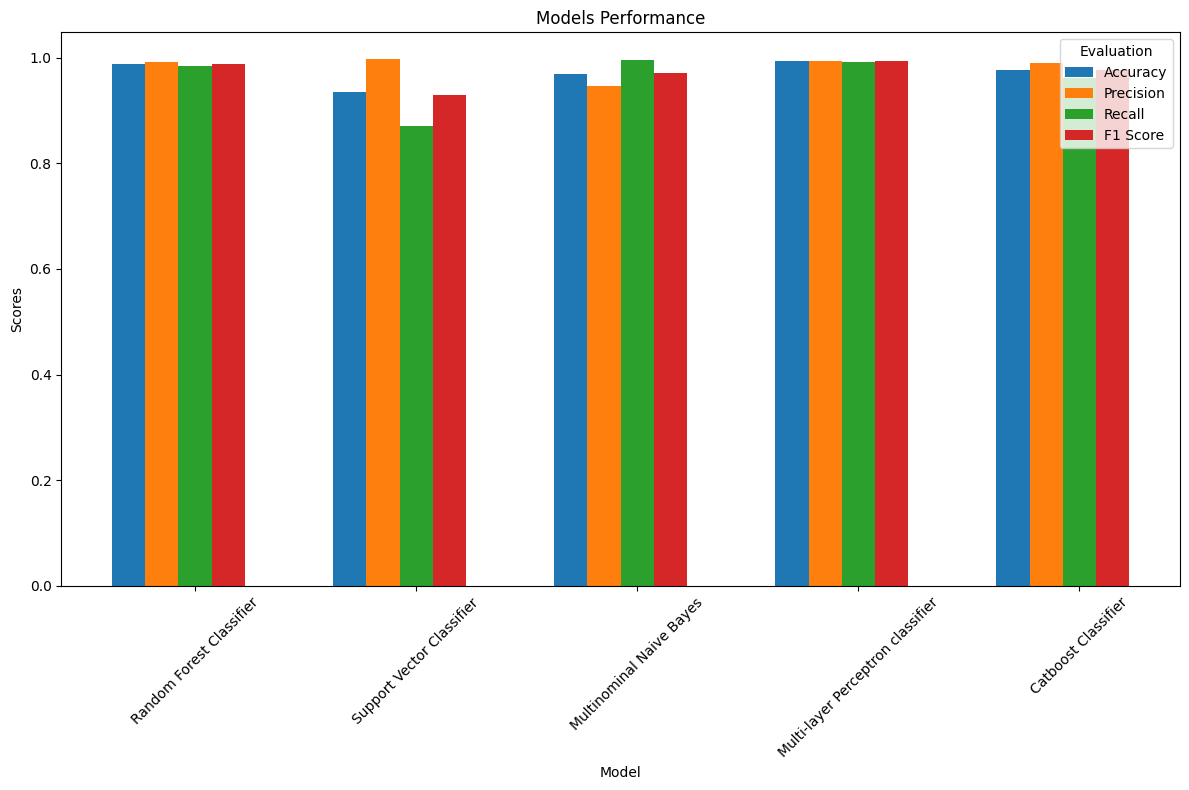

In [45]:
# Membuat variabel untuk menampung nilai score dari model
accuracies = []
precisions = []
recalls = []
f1 = []

# Calculate the performance
for model in models:
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)

    accuracies.append(accuracy_score(y_test, pred))
    precisions.append(precision_score(y_test, pred, pos_label='ham'))
    recalls.append(recall_score(y_test, pred, pos_label='ham'))
    f1.append(f1_score(y_test, pred, pos_label='ham'))

# Menampilkan hasil score dari model
for i in range(len(models)):
    print(f"Model: {model_names[i]}")
    print(f"Accuracy: {accuracies[i]}")
    print(f"Precision: {precisions[i]}")
    print(f"Recall: {recalls[i]}")
    print(f"F1 Score: {f1[i]}")
    print("-------------------")

axis = np.arange(len(model_names))

# Membuat visualisasi bar chart
plt.figure(figsize=(12, 8))
plt.bar(axis - 0.3, accuracies, 0.15, label='Accuracy')
plt.bar(axis - 0.15, precisions, 0.15, label='Precision')
plt.bar(axis, recalls, 0.15, label='Recall')
plt.bar(axis + 0.15, f1, 0.15, label='F1 Score')

plt.xticks(axis, model_names, rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.xlabel("Model")
plt.ylabel("Scores")
plt.title("Models Performance")
plt.legend(title="Evaluation")
plt.tight_layout()  # Untuk memastikan label tidak tumpang tindih
plt.show()

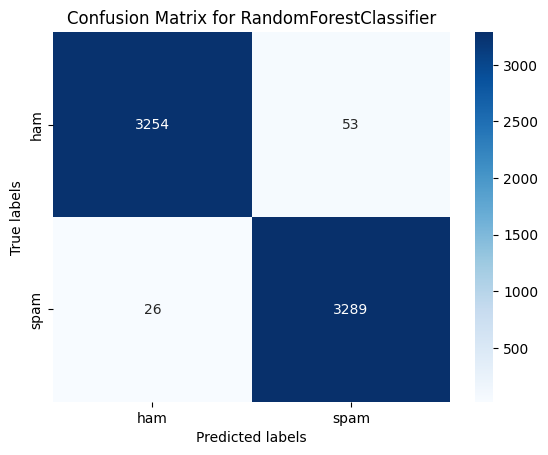

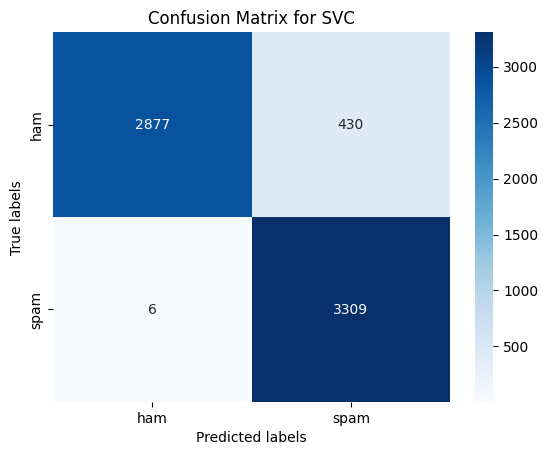

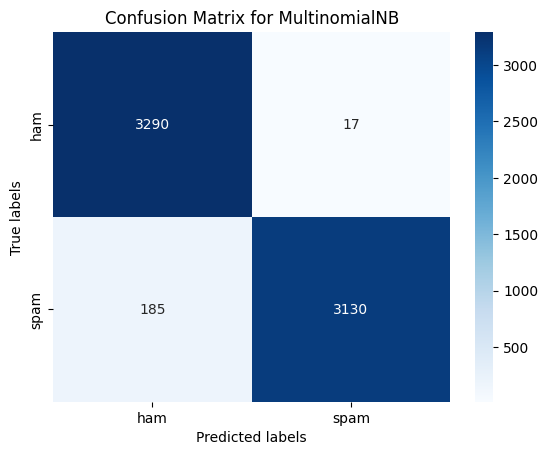

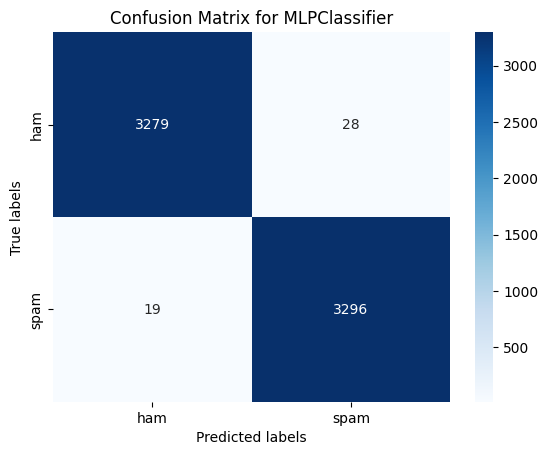

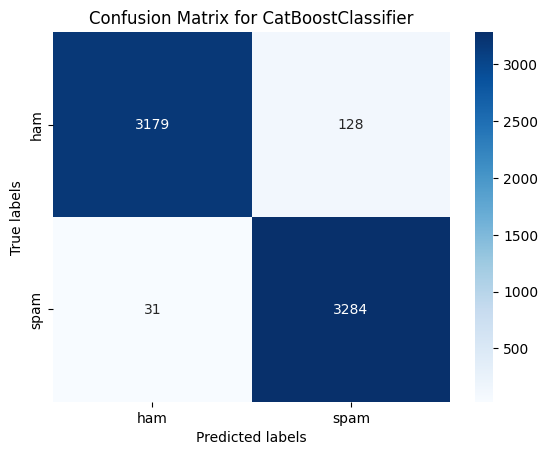

In [50]:
# Visualize the matrix
for i, model in enumerate(models):
    pred = model.predict(X_test_scaled)
    matrix = confusion_matrix(y_test, pred)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.show()

In [74]:
for model in models:
    # Predict new data
    new_data = ["Get rich quick! Earn $1000 a day with our easy money-making scheme."]
    new_data_transformed = vectorizer.transform(new_data)
    
    new_pred = model.predict(new_data_transformed)
    
    if new_pred[0] == 'Spam':
        print(f'Predicted by {type(model).__name__}: Spam text')
    else:
        print(f'Predicted by {type(model).__name__}: Ham text')

Predicted by RandomForestClassifier: Ham text
Predicted by SVC: Ham text
Predicted by MultinomialNB: Ham text
Predicted by MLPClassifier: Ham text
Predicted by CatBoostClassifier: Ham text


## Model Selection | Pemilihan Model

In [73]:
# Buat DataFrame untuk menyimpan hasil evaluasi model
evaluation_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1
})

# Urutkan model berdasarkan nilai akurasi (accuracy) secara menurun
sorted_by_accuracy = evaluation_df.sort_values(by='Accuracy', ascending=False)
print("Urutan model berdasarkan nilai akurasi (accuracy):")
print(sorted_by_accuracy[['Model', 'Accuracy']])

# Ambil model terbaik berdasarkan nilai akurasi (accuracy)
best_model_by_accuracy = sorted_by_accuracy.iloc[0]['Model']
print("\nModel terbaik berdasarkan akurasi (accuracy):", best_model_by_accuracy)

Urutan model berdasarkan nilai akurasi (accuracy):
                               Model  Accuracy
3  Multi-layer Perceptron classifier  0.992902
0           Random Forest Classifier  0.988070
4                Catboost Classifier  0.975989
2           Multinominal Naive Bayes  0.969496
1          Support Vector Classifier  0.934159

Model terbaik berdasarkan akurasi (accuracy): Multi-layer Perceptron classifier


# Conclusion | Kesimpulan

Kesimpulan yang didapat dari data yang ada diatas adalah pemilihan Model dan Parameter yang digunakan sudah sangat sesuai dengan Dataset karena terlihat jelas bahwa nilai score test dari semua model hasilkan sangat bagus yaitu 0,9 hampir 1 dan perbandingan antara score train dan score test tidak berbeda jauh (dapat dilihat pada Model Evaluation). Tetapi Model terbaik dengan nilai akurasi tertinggi adalah Multi-layer Perceptron classifier. Mungkin karena merupakan salah satu model dari Neural Network yang menjadikan model MLP ini menjadi lebih kompleks dan bagus dibanding model lainnya.